In [146]:
#imports
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
from sklearn.linear_model import LinearRegression #linear regression tool
import statsmodels.api as sm #linear regression tool

In [147]:
#read in the raw csv file
house_value_df = pd.read_csv("../data/real_estate_value_cleaned.csv", encoding= 'utf-8')
house_value_df.info() #check to ensure it worked
print(house_value_df.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_date                     338 non-null    float64
 1   house_age                            338 non-null    float64
 2   distance_to_the_nearest_MRT_station  338 non-null    float64
 3   number_of_convenience_stores         338 non-null    int64  
 4   latitude                             338 non-null    float64
 5   longitude                            338 non-null    float64
 6   house_price_of_unit_area             338 non-null    float64
 7   log_house_price_of_unit_area         338 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 21.2 KB
   transaction_date  house_age  distance_to_the_nearest_MRT_station  \
0          2012.917       32.0                             84.87882   
1          2012.917       19.5             

In [148]:
#get the train test split
X_train, X_test = train_test_split(house_value_df, test_size = 0.2) # splits the data into two parts with 1:4 ratio
print(X_train.shape)
print(X_test.shape)

(270, 8)
(68, 8)


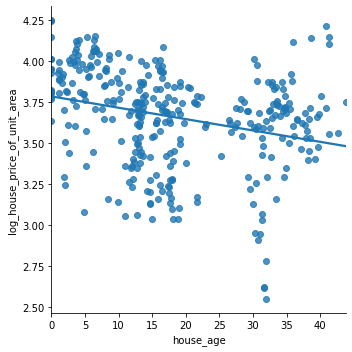

In [149]:
#plot the house age to see if there is a correlation between it and the price of unit
sns.lmplot(x = 'house_age', y = 'log_house_price_of_unit_area', data = house_value_df, ci = 0)
plt.draw()

In [160]:
#this is one way to do it, we'll use sm below.

#instantiate the tool you would like to use.
lr = LinearRegression()

#fit the model
lr.fit(X_train[['transaction_date', 'house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']], X_train.log_house_price_of_unit_area)

#check-out the results or make predictions
print(lr.intercept_, lr.coef_)

-556.8402406363114 [ 1.13789330e-01 -7.45432350e-03 -3.21899877e-04  1.48278773e-02
  9.26474004e+00  8.25476095e-01]


In [154]:
#set the training and testing data
X = X_train[['transaction_date','house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
y = X_train.log_house_price_of_unit_area
X = sm.add_constant(X) #add the constant to the model
mod = sm.OLS(y, X, hasconst= True) #create the ordinary least squares model
res = mod.fit() #fit the model
print(res.summary()) #summarize the model

                                 OLS Regression Results                                 
Dep. Variable:     log_house_price_of_unit_area   R-squared:                       0.692
Model:                                      OLS   Adj. R-squared:                  0.685
Method:                           Least Squares   F-statistic:                     98.49
Date:                          Mon, 21 Sep 2020   Prob (F-statistic):           2.35e-64
Time:                                  17:56:22   Log-Likelihood:                 102.90
No. Observations:                           270   AIC:                            -191.8
Df Residuals:                               263   BIC:                            -166.6
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------

In [156]:
Xtest = X_test[['transaction_date','house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
ytest = X_test.log_house_price_of_unit_area
Xtest = sm.add_constant(Xtest)

res.predict(Xtest);

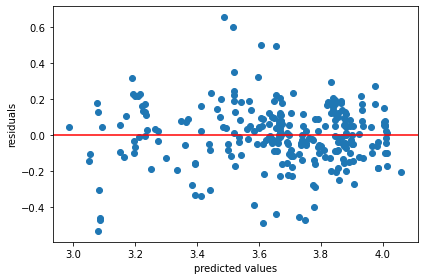

In [153]:
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.tight_layout()

In [ ]:
########################################
#Here we try a regression model using the house_price_of_unit_area (not the log)

In [157]:
#set the training and testing data
X = X_train[['transaction_date','house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
y = X_train.house_price_of_unit_area
X = sm.add_constant(X) #add the constant to the model
mod = sm.OLS(y, X, hasconst= True) #create the ordinary least squares model
res = mod.fit() #fit the model
print(res.summary()) #summarize the model

                               OLS Regression Results                               
Dep. Variable:     house_price_of_unit_area   R-squared:                       0.655
Model:                                  OLS   Adj. R-squared:                  0.647
Method:                       Least Squares   F-statistic:                     83.31
Date:                      Mon, 21 Sep 2020   Prob (F-statistic):           5.85e-58
Time:                              20:11:32   Log-Likelihood:                -884.07
No. Observations:                       270   AIC:                             1782.
Df Residuals:                           263   BIC:                             1807.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [158]:
Xtest = X_test[['transaction_date','house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
ytest = X_test.house_price_of_unit_area
Xtest = sm.add_constant(Xtest)

res.predict(Xtest);

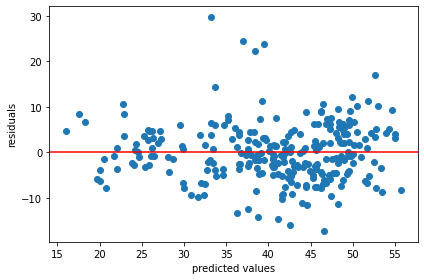

In [159]:
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.tight_layout()

In this residual plot, as the predicted values increase, the variance away from 0 also seems to increase (non-constant variance of error terms).  To fix this issue, we take the log of the house_price_of_unit_area and predict that value instead.  I performed this above to show the improved results and no pattern in the residuals.